In [1]:
import random

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [2]:
class LinearRegression:
    def __init__(self, lr: float = 0.1, thr: float = 0.00001, n_epochs: int = 1000):
        self.lr = lr
        self.thr = thr
        self.n_epochs = n_epochs
        self.w = np.array([random.uniform(-5, 5),
                           random.uniform(-5, 5),
                           random.uniform(-5, 5),
                           random.uniform(-5, 5),
                           random.uniform(-5, 5)])
        print(f"Init w: {self.w}")

    def predict(self, X: np.ndarray) -> list:
        return X @ self.w 


    def update_w(self, X: np.array, y: np.array):
        # wk = wk - lr / m * sum((h(xi) - yi) * xik)
        # w = w - lr / m * XT @ (w @ X - y)
        m = len(y)

        h = self.predict(X)

        self.w -= self.lr / m * X.T @ (h - y)

    def fit(self, X: np.array, y: np.array):
        last_cost = 1000000
        print(f"X.shape {X.shape}, y.shape {y.shape}")

        for i in range(self.n_epochs):
            self.update_w(X, y)
            new_cost = cost(y, self.predict(X))
            print(f"{i}, {self.w}, {new_cost}")
            if last_cost - new_cost < self.thr:
                break
            last_cost = new_cost
            
            
def cost(y: np.array, h: np.array) -> float:
    return np.mean((h - y) ** 2) / 2

In [3]:
df = pd.read_csv('Housing.csv')
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [4]:
df.shape

(545, 13)

# Нормалізація данних

### за допомогою def normalize():

In [5]:
def normalize(value):
  return (value - value.mean())/value.std()

In [6]:
normalize_df = pd.DataFrame()

In [7]:
normalize_df['price'] = normalize(df['price'])
normalize_df['area'] = normalize(df['area'])
normalize_df['bedrooms'] = normalize(df['bedrooms'])
normalize_df['bathrooms'] = normalize(df['bathrooms'])
normalize_df['stories'] = normalize(df['stories'])
normalize_df['parking'] = normalize(df['parking'])
normalize_df

,price,area,bedrooms,bathrooms,stories,parking
0,4.562174,1.045766,1.402131,1.420507,1.376952,1.516299
1,4.000809,1.755397,1.402131,5.400847,2.529700,2.676950
2,4.000809,2.216196,0.047235,1.420507,0.224204,1.516299
3,3.982096,1.082630,1.402131,1.420507,0.224204,2.676950
4,3.551716,1.045766,1.402131,-0.569663,0.224204,1.516299
...,...,...,...,...,...,...
540,-1.575421,-0.990968,-1.307661,-0.569663,-0.928544,1.516299
541,-1.603676,-1.267448,0.047235,-0.569663,-0.928544,-0.805002
542,-1.612845,-0.705273,-1.307661,-0.569663,-0.928544,-0.805002
543,-1.612845,-1.032440,0.047235,-0.569663,-0.928544,-0.805002


### За допомогою MinMaxScaler()

In [8]:
scaler = MinMaxScaler()

new_df = pd.DataFrame()
new_df_price = pd.DataFrame()

new_df_price['price'] = df['price']
new_df['area'] = df['area']
new_df['bedrooms'] = df['bedrooms']
new_df['bathrooms'] = df['bathrooms']
new_df['stories'] = df['stories']
new_df['parking'] = df['parking']

normalize_df = scaler.fit_transform(new_df)
normalize_df_price = scaler.fit_transform(new_df_price)

normalize_df

array([[0.39656357, 0.6       , 0.33333333, 0.66666667, 0.66666667],
       [0.5024055 , 0.6       , 1.        , 1.        , 1.        ],
       [0.57113402, 0.4       , 0.33333333, 0.33333333, 0.66666667],
       ...,
       [0.13539519, 0.2       , 0.        , 0.        , 0.        ],
       [0.08659794, 0.4       , 0.        , 0.        , 0.        ],
       [0.15120275, 0.4       , 0.        , 0.33333333, 0.        ]])

In [9]:
X = np.array(normalize_df)
y = np.array(normalize_df_price)
y = np.squeeze(normalize_df_price)

linear_regression = LinearRegression()

linear_regression.fit(X, y)


Init w: [4.42327331 4.55810234 0.97494343 4.7466502  2.02270213]
X.shape (545, 5), y.shape (545,)
0, [4.30141196 4.36313749 0.91579846 4.57822991 1.89343987], 11.052945264321446
1, [4.18466245 4.17639885 0.85921493 4.41675355 1.76997085], 10.142418699778279
2, [4.07280785 3.99753804 0.80508425 4.26192837 1.65204711], 9.30738783264154
3, [3.96564044 3.82622141 0.7533024  4.11347399 1.53943121], 8.541587616246309
4, [3.86296132 3.66212949 0.7037698  3.97112192 1.43189581], 7.83927299057042
5, [3.76458001 3.50495635 0.65639108 3.83461504 1.32922322], 7.19517572312202
6, [3.67031412 3.354409   0.61107491 3.70370711 1.231205  ], 6.604464832071624
7, [3.57998898 3.2102069  0.56773384 3.57816233 1.13764156], 6.062710294298895
8, [3.49343734 3.07208139 0.52628412 3.45775487 1.04834179], 5.565849765703047
9, [3.41049905 2.9397752  0.48664555 3.34226847 0.96312272], 5.110158063756029
10, [3.33102074 2.81304197 0.44874133 3.23149602 0.88180912], 4.692219183029707
11, [3.25485556 2.69164576 0.4124

In [10]:
def predict(w0, w1, w2, w3, w4, x):
    return w0 + w1 * x + w2 * x + w3 * x + w4 * x

In [11]:
X[:, 0].shape

(545,)

In [12]:
y.shape

(545,)

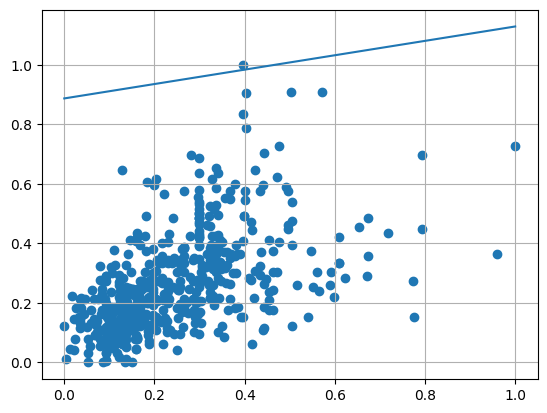

In [14]:
plt.scatter(X[:, 0], y)

plt.plot([0, 1], [predict(0.8874196, -0.04205171, 0.06792106, 0.20671849, 0.00920304, i) for i in [0, 1]])
plt.grid()